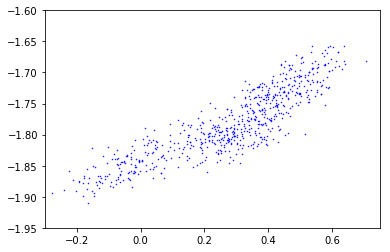

In [8]:
# returns dictionary of names
# to pairs of x,y coordinates

def get_info_from_csv_lines(lines):
    # I want a map from gene name to x,y pair
    map_gene_xy = {}
    i = -1
    for line in lines:
        i += 1
        if (i != 0):
            name, x, y = line.split(',')
            pair_xy = [float(x), float(y)]
            map_gene_xy[name] = pair_xy
    return map_gene_xy

# returns dictionary of names to list of pairs,
# where each pair is the adjacency and its type

def populate_adj_list_from_tsv_lines(lines):
    # returns another map. The key is a node
    # in the first column, which maps to a list
    # of pairs. Each pair is the node to which
    # the edge exists and its category
    # 'SL', 'Non-SL', 'Inconclusive'
    map_gene_adj = {}
    i = -1
    for line in lines:
        i += 1
        if (i != 0):
            g1, g2, score, category = line.split('\t') 
            if g1 in map_gene_adj:
                pair = [g2, category]
                if pair not in map_gene_adj[g1]:
                    map_gene_adj[g1].append(pair)
            else: # no key exists so start the list
                map_gene_adj[g1] = [[g2, category]]
    return map_gene_adj

import matplotlib.pyplot as plt

# Let's start getting files
sc_csv_lines = [line.rstrip('\n') for line in open('ScNodeVecs2.csv')]
sc_tsv_edges_and_categories = [line.rstrip('\n') for line in open('collins-sc-emap-gis-std.tsv')]

gene_coordinate_map = get_info_from_csv_lines(sc_csv_lines)
gene_edge_map = populate_adj_list_from_tsv_lines(sc_tsv_edges_and_categories)

# plot points
for gene in gene_coordinate_map:
    x, y = gene_coordinate_map[gene]
    # print('plotting (' + str(x) + ',' + str(y) + ')')
    plt.scatter(x, y, s=0.25, c='#0000FF')
    
# plot edges
# print('starting')
i = 0
for gene in gene_edge_map:
    x1, y1 = gene_coordinate_map[gene]
    adjacencies = gene_edge_map[gene]
    for adj in adjacencies:
        neighbor, category = adj
        
        i += 1
        
        x2, y2 = gene_coordinate_map[neighbor]
        
        if category == 'Inconclusive':
            # print('edge ' + str(i) + ' inc')
            plt.plot([x1, x2], [y1, y2], c='tab:gray', ls='solid')
        elif category == 'Non-SL':
            # print('edge ' + str(i) + ' NSL')
            plt.plot([x1, x2], [y1, y2], c='tab:blue', ls='solid')
        else: # category == 'SL'
            # print('edge ' + str(i) + ' SL')
            plt.plot([x1, x2], [y1, y2], c='tab:red', ls='solid')                
                
plt.axis([-0.3, 0.75, -1.95, -1.6])
plt.show()